# Exploratory Data Analysis

## Goals
The goal is to learn to use pandas to load a dataset, perform a basic analysis, and answer some questions that we may have about that data.

## Introduction

The first steps before performing an analysis in a dataset, is to simply "explore" it. This is called **Exploratory Data Analysis**, or EDA, for short. The term was coined by [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). (Sidenote: among other things, he also co-invented the Fast Fourier Transform.) If you are interested to learn more about EDA, then you can read this short encyclopedia [article](https://www.stat.berkeley.edu/~brill/Papers/EDASage.pdf) or the "[Art of Data Science](http://bedford-computing.co.uk/learning/wp-content/uploads/2016/09/artofdatascience.pdf)" handbook.

### Goals of Exploratory Data Analysis

1. To determine if there are any problems with your dataset.
2. To determine whether the question you are asking can be answered by the data that you have.
3. To develop a sketch of the answer to your question.

### Exploratory Data Analysis checklist

1. Formulate your question
2. Read in your data
3. "Check the packaging" (rows, columns, types, etc.)
4. Look at the top and the bottom of your data 
5. Check your “n”s (do you see the expected number of rows, columns?)
6. Validate with at least one external data source 
7. Make a plot
8. Try the easy solution first
9. Follow up (do you have the right data? do you need other data? do you have the right question?)

For this exercise we will download the MovieLens dataset. It has been used many times as a testbed for recommendation algorithms, i.e. to predict which movies the user may be interested in watching, similar to what Netflix does. There are various versions of the dataset. We will use the "Movielens 20 Million", which contains approximately 20Million ratings of movies that users watched.

## Questions
These are the questions that we are interested in answering:

1. How many movies?
2. How many users?
3. How many ratings?
4. What is the distribution of ratings?
5. What is the average rating across all users?
6. What is the average rating across *per user*?
7. Which are the most-watched movies?
8. Which are the most-favorite movies (best avergae rating)?
9. Which are the most popular geners?
8. Which are the most-watched movies in the state of California and New York? no data for this
9. In which state do they watch mostly comedies?
10. In which state do they watch mostly thrillers?
11. In which city is the user with the most consistent rating bahavior?
12. In which city is the user with the most erratic rating behavior?
11. Find groups of users that have watched at least 20 similar movies.
12. If someone has watched "The Matrix" which other movie would you recommend?


## Downloading the necessary file(s)
You may download MovieLens from [here](https://grouplens.org/datasets/movielens/20m/), or it's always better if we do it programmatically!

In [5]:
# Removes any prior file if it exists
!rm -f data/ml-20m.zip
# Fetches the most recent dataset and stores it under the folder data
!curl 'http://files.grouplens.org/datasets/movielens/ml-20m.zip' -o data/ml-20m.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  189M  100  189M    0     0  2344k      0  0:01:22  0:01:22 --:--:-- 2019k


Now we have a file called ```ml-20m.zip```. You can unzip it as follows, which will create a directory with the same name.

In [6]:
!unzip data/ml-20m.zip

Archive:  data/ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Loading data

In [13]:
# movies data
column_names_movies = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-20m/movies.csv', delimiter = ',', 
                     names = column_names_movies, header = 0)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# ratings data
ratings = pd.read_csv('ml-20m/ratings.csv', delimiter = ',', header = 0)
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [15]:
# summary of the movies Dataframe
movies.info()

print('')

# summary of the ratings Dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movie_id    27278 non-null int64
title       27278 non-null object
genres      27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [16]:
# check NaN values
print ("Number of movies Null values: ", movies.isnull().sum())
print ("Number of ratings Null values: ", ratings.isnull().sum())

Number of movies Null values:  movie_id    0
title       0
genres      0
dtype: int64
Number of ratings Null values:  userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [17]:
# drop Null values
movies.dropna(inplace=True)

# and check again for Nan values
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id    0
title       0
genres      0
dtype: int64


In [23]:
# split title and release year in separate columns
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [24]:
# check for NaN values
print ("Number of movies Null values: ", movies.isnull().sum())

# and drop them
movies.dropna(inplace=True)

# verify they dropped
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id     0
title        0
genres       0
year        22
dtype: int64
Number of movies Null values:  movie_id    0
title       0
genres      0
year        0
dtype: int64


In [25]:
# convert year column to integer 
movies['year'] = movies['year'].astype(int)
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [26]:
# convert timestamp to date
date = pd.to_datetime(ratings['timestamp']).astype(str)

# add column date to ratings
ratings['date'] = date
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,2,3.5,1112486027,1970-01-01 00:00:01.112486027
1,1,29,3.5,1112484676,1970-01-01 00:00:01.112484676
2,1,32,3.5,1112484819,1970-01-01 00:00:01.112484819
3,1,47,3.5,1112484727,1970-01-01 00:00:01.112484727
4,1,50,3.5,1112484580,1970-01-01 00:00:01.112484580


In [27]:
# remove the time from the date
ratings['date'] = [time[:10] for time in ratings['date']]
ratings.drop(['timestamp'], inplace = True, axis = 1)
ratings.head()

,userId,movieId,rating,date
0,1,2,3.5,1970-01-01
1,1,29,3.5,1970-01-01
2,1,32,3.5,1970-01-01
3,1,47,3.5,1970-01-01
4,1,50,3.5,1970-01-01


In [28]:
#  descriptive statistics of movies Dataframe
movies.describe()

,movie_id,year
count,27256.000000,27256.000000
mean,59811.215806,1989.371551
std,44415.893746,23.335631
min,1.000000,1891.000000
25%,6925.750000,1976.000000
50%,67953.000000,1998.000000
75%,100255.500000,2008.000000
max,131262.000000,2015.000000


In [29]:
#  descriptive statistics of ratings Dataframe
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


### number of movies, users and ratings

In [37]:
print("number of users: ", ratings.groupby("userId").count().shape[0])
print("number of movies: ", movies.shape[0])
print("number of ratings: ", ratings.shape[0])

number of users:  138493
number of movies:  27256
number of ratings:  20000263


### distribution of ratings

Text(0.5, 0, 'rating')

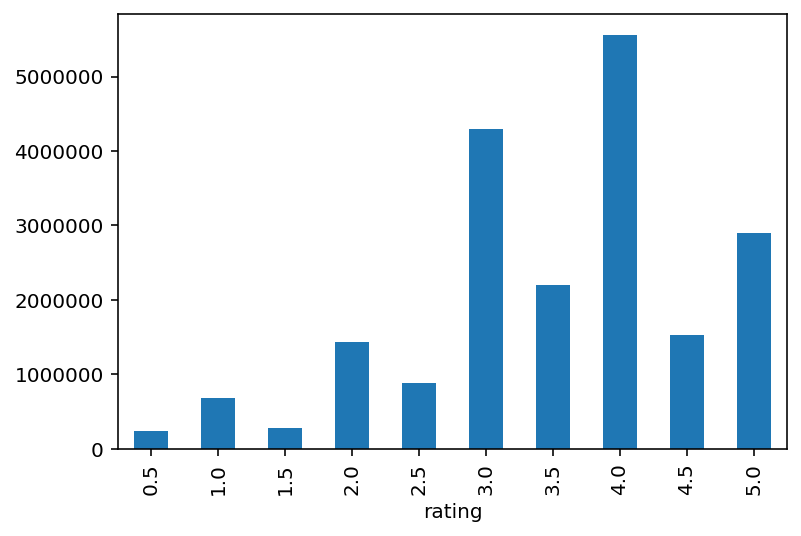

In [54]:
ratings["rating"].value_counts().sort_index().plot(kind="bar");
plt.xlabel("rating")

### average rating

In [55]:
# across all users
print("avg rating across all users: ", np.mean(ratings["rating"]))

avg rating across all users:  3.5255285642993797


In [57]:
# per user
ratings[["userId", "rating"]].groupby("userId").mean().head(10)

,rating
userId,
1,3.742857
2,4.000000
3,4.122995
4,3.571429
5,4.272727
6,3.750000
7,3.289855
8,3.800000
9,3.057143


### most watched movies

In [61]:
# mereg the dataframes to match the movie id to movie name
df = pd.merge(movies,ratings,left_on='movie_id', right_on="movieId")
df.head()

,movie_id,title,genres,year,userId,movieId,rating,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,1,4.0,1970-01-01
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,1,5.0,1970-01-01
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,1,4.0,1970-01-01
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,1,4.0,1970-01-01
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,1,4.5,1970-01-01


In [90]:
# most watched movies
df_ratingCount = df[["title", "rating"]].groupby("title").count()\
.rename(columns={'rating' : 'ratingCount'})\
.sort_values("ratingCount", ascending=False)
df_ratingCount.head(10)

,ratingCount
title,
Pulp Fiction (1994),67310
Forrest Gump (1994),66172
"Shawshank Redemption, The (1994)",63366
"Silence of the Lambs, The (1991)",63299
Jurassic Park (1993),59715
Star Wars: Episode IV - A New Hope (1977),54502
Braveheart (1995),53769
Terminator 2: Judgment Day (1991),52244
"Matrix, The (1999)",51334


In [91]:
# movies with best avg ratings
df_ratingMean = df[["title", "rating"]].groupby('title').mean()\
                             .rename(columns={'rating' : 'ratingMean'})\
                             .sort_values('ratingMean',ascending=False)
df_ratingMean.head()

,ratingMean
title,
The Old Gun (1975),5.0
Life On A String (Bian chang Bian Zou) (1991),5.0
Latin Music USA (2009),5.0
Rock the Boat (1944),5.0
De la servitude moderne (2009),5.0


In [92]:
# create Dataframe: ratings count and mean rating per movie
pd.merge(df_ratingCount,df_ratingMean, on='title')\
.sort_values('ratingCount',ascending=False).head(10)

,ratingCount,ratingMean
title,,
Pulp Fiction (1994),67310,4.174231
Forrest Gump (1994),66172,4.029000
"Shawshank Redemption, The (1994)",63366,4.446990
"Silence of the Lambs, The (1991)",63299,4.177057
Jurassic Park (1993),59715,3.664741
Star Wars: Episode IV - A New Hope (1977),54502,4.190672
Braveheart (1995),53769,4.042534
Terminator 2: Judgment Day (1991),52244,3.931954
"Matrix, The (1999)",51334,4.187186


### Most popular geners

In [32]:
# most popular genres (with most ratings)
most_popular_genre = df.groupby('genres', as_index = False)['user_id'].count()
most_popular_genre = most_popular_genre.rename(columns={'user_id' : 'Total ratings'})
most_popular_genre.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
1130,Drama,1467402
883,Comedy,1315847
1016,Comedy|Romance,793252
927,Comedy|Drama,656474
1209,Drama|Romance,644626
957,Comedy|Drama|Romance,615897
1035,Crime|Drama,467417
165,Action|Adventure|Sci-Fi,441351
173,Action|Adventure|Thriller,313902
349,Action|Crime|Thriller,310685


In [33]:
# movies distribution per genres
movies_genres = movies.groupby('genres', as_index = False)['movie_id'].count()
movies_genres = movies_genres.rename(columns={'movie_id' : 'Total ratings'})
movies_genres.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
1142,Drama,4520
893,Comedy,2291
1119,Documentary,1939
938,Comedy|Drama,1264
1222,Drama|Romance,1075
1028,Comedy|Romance,757
968,Comedy|Drama|Romance,605
1280,Horror,565
1047,Crime|Drama,448
1236,Drama|Thriller,426


## Visual Data Analysis

In [34]:
# select plot style
plt.style.use('ggplot')

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Distribution of ratings per movie (with ratings count  > 10000)

Text(0,0.5,'Number of movies')

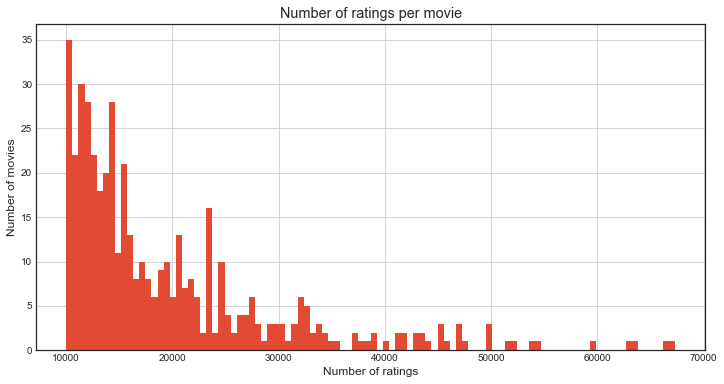

In [35]:
# the graph indicates that most of the movies have less than 40000 ratings
plt.figure(figsize=(12,6))
df_movies_ext[df_movies_ext['ratingCount'] > 10000]['ratingCount'].hist(bins=100)
plt.title('Number of ratings per movie')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')

#### Movies distribution per year (> 1960)

Text(0,0.5,'Number of movies')

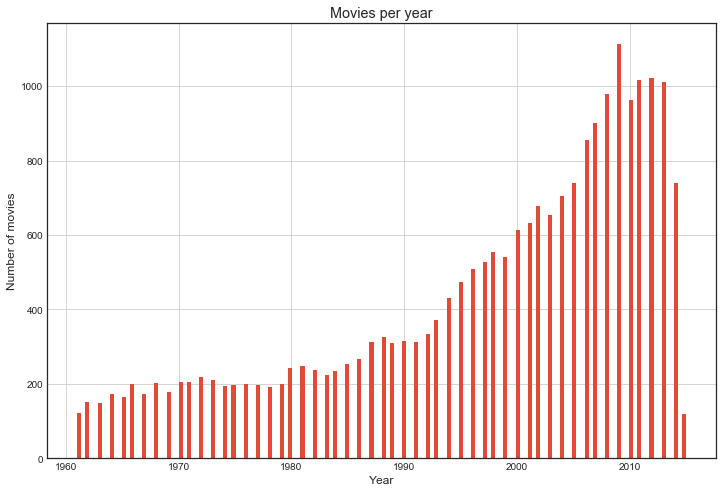

In [36]:
# most movies have been released after 1990
plt.figure(figsize=(12,8))
movies[movies['year'] > 1960]['year'].hist(bins=150)
plt.title('Movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

#### Users distribution per occupation

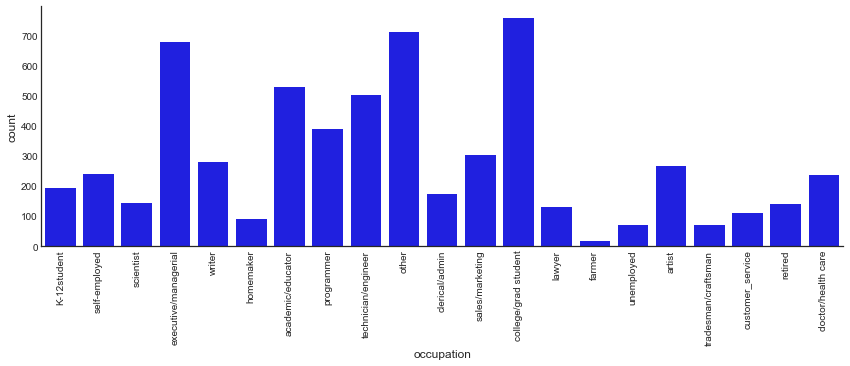

In [37]:
# most of the students are students
sns.factorplot("occupation", data=users, aspect=3, kind="count", color="b").set_xticklabels(rotation=90)

#### Ratings distribution per grade

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


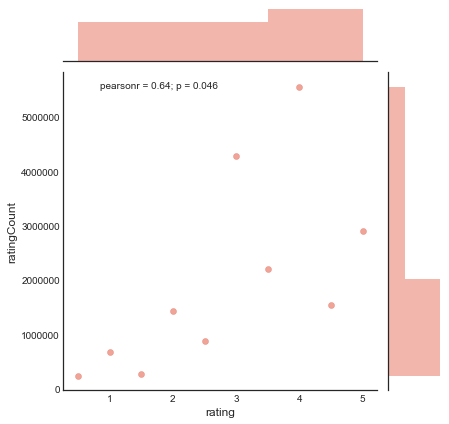

In [38]:
# most of the grades are equals or greater than 3
sns.jointplot(x='rating',y='ratingCount',data=df_rating_dist,alpha=0.5)

#### Relationship between number of ratings - ratings mean

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


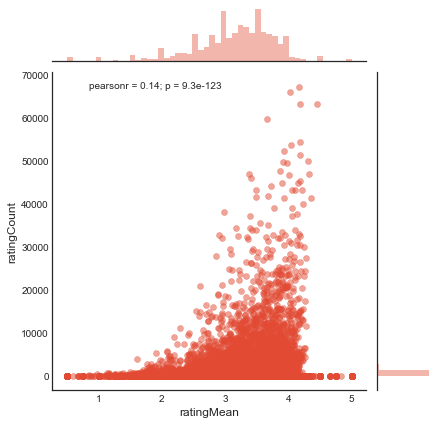

In [39]:
# the movies with the most ratings tend to have better rankings
sns.jointplot(x='ratingMean',y='ratingCount',data= df_movies_ext,alpha=0.5)

#### Ratings per user

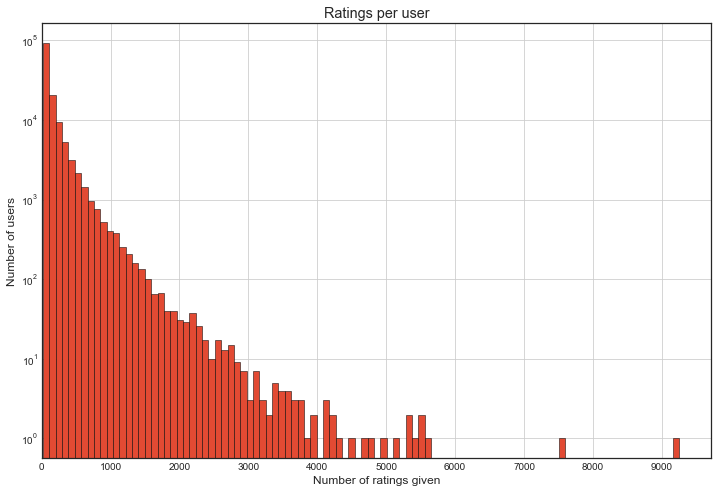

In [40]:
# most users have less than 4000 ratings
plt.figure(figsize=(12,8))
ratings_per_user['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of users')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,1000))
plt.show()